In [98]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista, train_model_adam

In [2]:
device = torch.device('cuda')

In [10]:
## data
import pandas as pd
df = pd.read_csv('C:/Users/chanyoung/Desktop/TCDF-master/data/gang_csv.csv')
df =df.drop('1210030000',axis = 1)

In [25]:
df

,1220029700,1220032100,1220033000,1220024600,1220028200,1220025300,1220029200,1220034000,1220034300,1220027500,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
0,25.19,29.65,28.08,25.14,20.30,28.74,31.59,32.78,27.48,22.42,...,31.11,31.87,25.61,35.04,36.00,31.82,25.18,24.80,17.00,29.09
1,26.96,24.27,26.63,26.65,20.49,26.28,28.80,30.56,26.95,26.38,...,30.26,34.42,26.18,34.95,36.61,30.24,25.07,21.33,26.80,28.95
2,26.20,28.07,27.76,24.94,22.35,27.88,32.74,32.22,35.34,24.03,...,33.27,24.70,24.06,31.08,37.30,27.94,24.16,30.84,24.68,31.14
3,26.72,23.98,26.34,27.54,24.68,29.85,27.55,28.83,31.98,24.20,...,32.80,30.08,26.93,35.77,34.74,27.34,25.15,27.20,24.02,33.40
4,27.21,24.11,26.63,24.71,19.57,26.93,29.77,30.60,28.39,23.18,...,30.48,26.82,26.36,32.22,38.51,28.47,23.82,30.69,23.19,33.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,25.93,30.45,24.45,33.18,15.57,20.59,30.61,29.28,23.61,30.60,...,19.85,25.20,27.80,31.92,30.67,24.67,29.33,27.84,25.39,19.88
2876,28.45,27.57,25.38,26.65,14.22,22.52,28.59,31.06,23.44,25.70,...,24.13,22.81,30.25,33.22,30.90,35.58,24.49,20.18,23.27,20.13
2877,25.24,27.17,25.96,30.91,14.31,22.32,33.68,27.55,24.82,30.14,...,22.21,23.94,30.70,37.34,36.29,26.00,27.74,24.46,27.52,21.00
2878,28.05,27.64,26.57,27.84,14.21,19.66,34.09,38.60,23.98,32.08,...,24.17,20.92,29.39,31.57,32.62,27.73,31.33,30.03,22.63,20.20


In [87]:
df_morning = df.loc[1560:1571]

In [111]:
df_morning

,1220029700,1220032100,1220033000,1220024600,1220028200,1220025300,1220029200,1220034000,1220034300,1220027500,...,1220026300,1220033400,1220025200,1220033100,1220031800,1220033300,1220031000,1220034600,1220032800,1220026800
1560,23.05,18.76,16.57,19.36,7.75,20.40,22.79,18.02,16.67,26.15,...,19.24,21.35,16.31,21.69,16.56,28.66,16.93,24.86,26.32,22.39
1561,24.95,21.30,18.23,20.55,7.44,25.35,21.60,18.22,18.36,26.64,...,16.87,20.18,16.38,21.94,16.96,24.34,18.48,25.07,21.23,19.83
1562,24.27,20.73,16.28,17.56,7.22,22.96,21.28,18.38,18.10,26.99,...,17.65,21.98,16.07,23.13,18.54,25.53,17.40,26.22,20.52,19.37
1563,23.73,21.12,15.94,20.40,6.90,22.25,24.94,18.05,17.03,25.10,...,19.00,16.79,15.28,24.59,15.98,26.21,17.99,23.84,23.42,17.50
1564,23.67,18.49,15.51,18.34,6.62,24.46,21.22,20.40,16.84,25.23,...,18.67,18.29,14.67,20.33,15.67,20.93,17.94,25.86,22.56,16.30
1565,25.70,21.00,15.08,20.35,6.29,24.76,23.85,23.98,17.11,27.33,...,16.82,7.00,15.59,25.59,19.50,23.02,17.37,23.56,20.19,16.58
1566,24.18,19.50,14.97,18.50,6.35,25.18,25.29,19.74,16.46,25.71,...,16.35,15.72,17.30,23.35,16.24,21.24,17.81,25.84,21.10,14.81
1567,23.97,19.74,14.62,18.33,7.49,22.45,21.64,21.58,16.19,26.03,...,18.82,15.34,15.09,21.17,16.11,26.57,19.50,24.65,20.16,14.85
1568,25.59,19.37,16.83,17.34,5.97,20.92,20.00,23.16,15.82,25.08,...,15.25,37.97,15.27,23.34,15.03,22.99,17.76,25.13,18.43,15.04
1569,26.22,26.37,16.81,22.56,6.44,20.68,20.33,24.69,17.90,27.09,...,14.28,15.71,15.09,23.09,18.59,24.53,18.44,33.59,17.38,13.27


In [88]:
df_np = df_morning.values

In [89]:
X = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)

In [42]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [45]:
df_np_scaled = df.values
X_scaled = torch.tensor(df_np[np.newaxis], dtype=torch.float32, device=device)

## SETUP model

In [99]:
clstm = cLSTM(X.shape[-1], hidden=2).cuda(device=device)

In [102]:
train_loss_adam = train_model_ista(
    clstm, X, context=1, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 700.914490
Variable usage = 99.88%
----------Iter = 100----------
Loss = 349.689758
Variable usage = 77.90%
----------Iter = 150----------
Loss = 180.458374
Variable usage = 38.13%
----------Iter = 200----------
Loss = 119.991318
Variable usage = 31.39%
----------Iter = 250----------
Loss = 81.190262
Variable usage = 26.81%
----------Iter = 300----------
Loss = 55.932442
Variable usage = 24.68%
----------Iter = 350----------
Loss = 39.457970
Variable usage = 21.79%
----------Iter = 400----------
Loss = 28.633835
Variable usage = 14.10%
----------Iter = 450----------
Loss = 21.584621
Variable usage = 9.11%
----------Iter = 500----------
Loss = 16.952370
Variable usage = 6.65%
----------Iter = 550----------
Loss = 13.893640
Variable usage = 3.97%
----------Iter = 600----------
Loss = 11.871547
Variable usage = 3.02%
----------Iter = 650----------
Loss = 10.507687
Variable usage = 2.12%
----------Iter = 700----------
Loss = 9.578363
Variable usage = 1.

In [107]:
clstm.GC()

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 1, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0', dtype=torch.int32)

In [105]:
GC_est

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

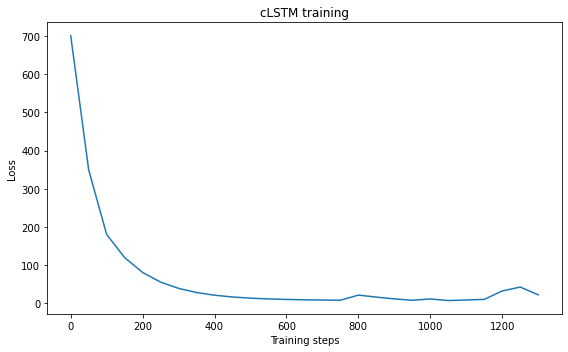

In [110]:
plt.figure(figsize=(8, 5))
plt.plot(50 * np.arange(len(train_loss_adam)), train_loss_adam)
plt.title('cLSTM training')
plt.ylabel('Loss')
plt.xlabel('Training steps')
plt.tight_layout()
plt.show()

Estimated variable usage = 4.06%


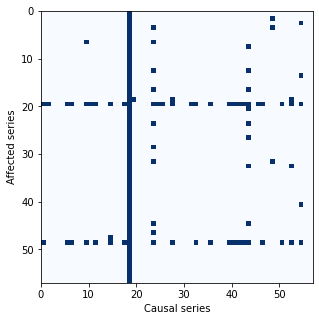

In [108]:
GC_est = clstm.GC().cpu().data.numpy()
fig, axarr = plt.subplots( figsize=(10, 5))
axarr.imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr.set_ylabel('Affected series')
axarr.set_xlabel('Causal series')
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))